**Name -** Manav Basida

**Student ID -** u3259727

**Solo Project**

This project is about predicting the stock prices of OTT giant Netflix. 

The data was collected from the popular site Kaggle.

[Netflix Stock Price Prediction Dataset](https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)

Many investors leverage stock prediction methods and tools, which can help them make more informed decisions about buying, selling, or holding stocks in their portfolios. These methods and tools utilize various techniques, including fundamental analysis, technical analysis, and machine learning algorithms, to analyze historical data, identify patterns, and forecast future price movements. By incorporating these predictions into their investment strategies, investors aim to improve their chances of achieving profitable returns and managing risks effectively in the dynamic and volatile stock market environment.

## Brief Description of Data

- This file contains data of Netflix stock details from 05 February 2018 till 04 February 2022.
- It has 7 columns which are Date, Open, High, Low, Close, Adj Close, Volume.

**Date**: The date of the trading day.

**Open**: The opening price of the stock at the beginning of the trading day.

**High**: The highest price reached by the stock during the trading day.

**Low**: The lowest price reached by the stock during the trading day.

**Close**: The closing price of the stock at the end of the trading day.

**Adj Close**: The adjusted closing price of the stock, which accounts for any corporate actions such as dividends, stock splits, or mergers.

**Volume**: The total number of shares traded during the trading day.

Each row represents one trading day, and the values in each column provide information about the stock's performance on that particular day.

The task is to create a machine learning model which can predict the prices of stock with a great accuracy. We shall try using different algorithms, compare them and see which turns out to be the best algorithm.


## Step 1 - Reading the Dataset

In [1]:
#suprress any warning messages
import warnings
warnings.filterwarnings('ignore')

# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import tkinter as tk
from tkinter import ttk

# Read the csv file
netflix_stock_prices  = pd.read_csv('D:/Australia Assignments/Manav/Capstone Project/NFLX.csv')

#Lets round of the values to two decimals for the columns Open, High, Low, Close, Adj Close for our simplicity
netflix_stock_prices['Open'] = netflix_stock_prices['Open'].round(2)
netflix_stock_prices['High'] = netflix_stock_prices['High'].round(2)
netflix_stock_prices['Low'] = netflix_stock_prices['Low'].round(2)
netflix_stock_prices['Close'] = netflix_stock_prices['Close'].round(2)
netflix_stock_prices['Adj Close'] = netflix_stock_prices['Adj Close'].round(2)

# Print the shape of the dataframe
netflix_stock_prices.shape

(1009, 7)

In [2]:
# Check if there are any duplicate rows
duplicate_rows = netflix_stock_prices.duplicated()

print('Total duplicate rows -> ', duplicate_rows.sum())

Total duplicate rows ->  0


In [3]:
# Display the stock prices of first 30 days
netflix_stock_prices.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.00,267.90,250.03,254.26,254.26,11896100
1,2018-02-06,247.70,266.70,245.00,265.72,265.72,12595800
2,2018-02-07,266.58,272.45,264.33,264.56,264.56,8981500
3,2018-02-08,267.08,267.62,250.00,250.10,250.10,9306700
4,2018-02-09,253.85,255.80,236.11,249.47,249.47,16906900
5,2018-02-12,252.14,259.15,249.00,257.95,257.95,8534900
6,2018-02-13,257.29,261.41,254.70,258.27,258.27,6855200
7,2018-02-14,260.47,269.88,260.33,266.00,266.00,10972000
8,2018-02-15,270.03,280.50,267.63,280.27,280.27,10759700
9,2018-02-16,278.73,281.96,275.69,278.52,278.52,8312400


In [4]:
# Display stock prices of last 30 days
netflix_stock_prices.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
979,2021-12-23,616.40,616.88,607.57,614.09,614.09,1621100
980,2021-12-27,615.00,615.00,609.25,613.12,613.12,2061500
981,2021-12-28,614.95,618.41,609.69,610.71,610.71,1882800
982,2021-12-29,610.71,613.98,604.68,610.54,610.54,1287200
983,2021-12-30,612.99,620.61,611.24,612.09,612.09,1625100
984,2021-12-31,610.01,614.08,602.05,602.44,602.44,1995900
985,2022-01-03,605.61,609.99,590.56,597.37,597.37,3067500
986,2022-01-04,599.91,600.41,581.60,591.15,591.15,4393100
987,2022-01-05,592.00,592.84,566.88,567.52,567.52,4148700
988,2022-01-06,554.34,563.36,542.01,553.29,553.29,5711800


## Step 2 - Problem Statement Definition
Our objective is to build a machine learning model which can accurately detect the closing price of the stock for a date. We will follow basic  approach such as data cleaning, data visualization, model building and model accuracy to perform the analysis and prediction for this dataset.

## Step 3 - Target Variable Identification
In this problem we try to predict the closing price and adj close and thus they are the target variables as they tell us the price of the stock at the end of the day. This predicted value can help the investor to know whether the stock price will increase or decrease for that day and thus he/she can make the decision accordingly.

In [5]:
# check dates on which closing price was not equal to adj closing price
print(netflix_stock_prices[netflix_stock_prices['Close'] != netflix_stock_prices['Adj Close']])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Here we can see that there are no records/ days on which Closing price and Adj closing price were different. Thus we can consider only closing price for our prediction and consider it as target variable.

## Step 4 - Visualizing the distribution of target variable

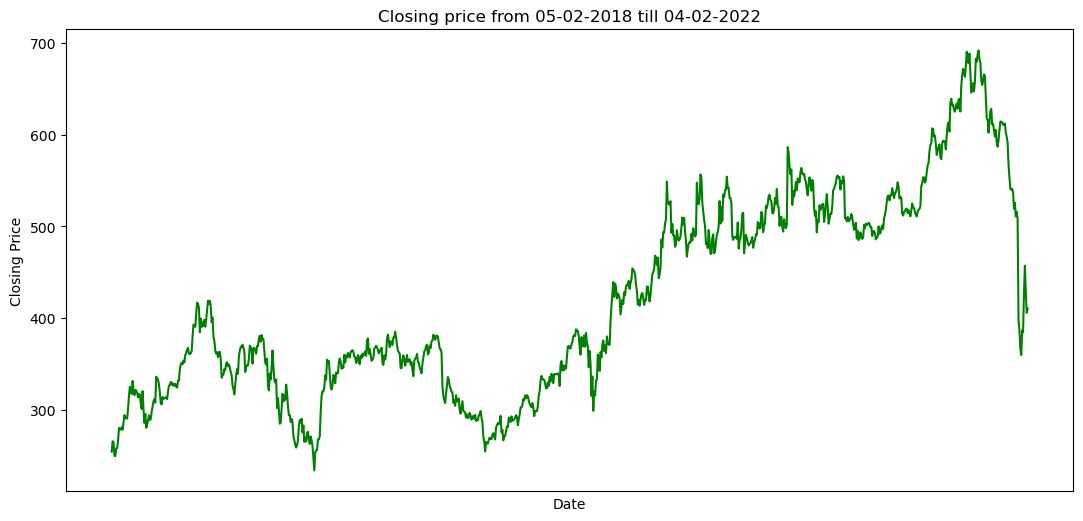

In [6]:
# Let's plot the closing price over the given time period
# Set some parameters for the plot
plt.figure(figsize=(13, 6))  # Set the figure size

plt.xticks([])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price from 05-02-2018 till 04-02-2022')

#Closing price plot
plt.plot(netflix_stock_prices['Date'],netflix_stock_prices['Close'], label='Closing Price', color='green')

# Show plot
plt.show()

From the plot we can see that the stock price has increased overall and took a dip during the last few days.

## Step 5 - Data Exploration at basic level
Lets explore the data of different columns and have our findings.

In [7]:
#Some basic information of the data frame
netflix_stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
#Display min,max, mean and other mathematical values for the columns
netflix_stock_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320704,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.920000,250.650000,231.230000,233.880000,233.880000,1.144000e+06
25%,331.490000,336.300000,326.000000,331.620000,331.620000,4.091900e+06
50%,377.770000,383.010000,370.880000,378.670000,378.670000,5.934500e+06
75%,509.130000,515.630000,502.530000,509.080000,509.080000,9.322400e+06
max,692.350000,700.990000,686.090000,691.690000,691.690000,5.890430e+07


Here all our columns are non null which means no column has null values for any record and all the columns have numeric values, hence they are of continuous type.

## Step 6 - Identifying and Rejecting useless columns

If we see Close and Adj Close columns they have same values for all the records. Hence we can delete the Adj close column from our dataset. Other than that, each column is of numeric and continuous type and might be relevant for our model. Still we may check if any column is not useful for our prediction in further steps.

In [9]:
netflix_stock_prices.drop(columns = ['Adj Close'], inplace = True)

## Step 7 - Visual Exploratory Data Analysis of data (with Histogram and Barcharts)

Let's plot some graphs and analyse some patterns in our data.

Histogram gives us the plot for range of values vs it's frequency.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

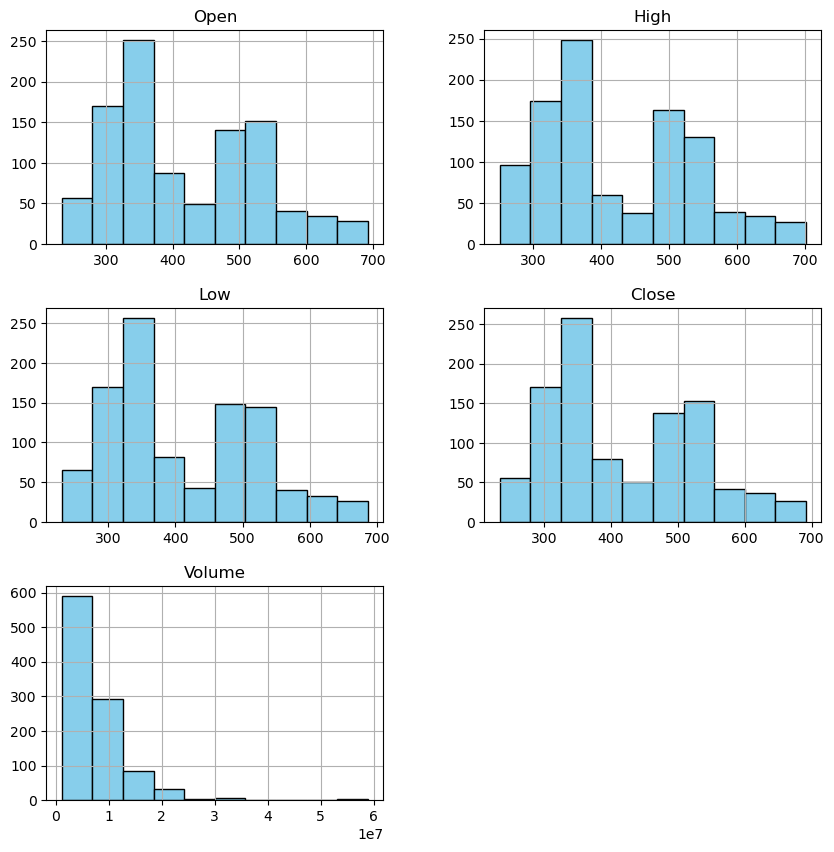

In [10]:
#ignoring the date column
columns_to_be_plotted = ['Open','High','Low','Close','Volume']
netflix_stock_prices.hist(columns_to_be_plotted, color='skyblue', edgecolor='black', figsize=(10,10))

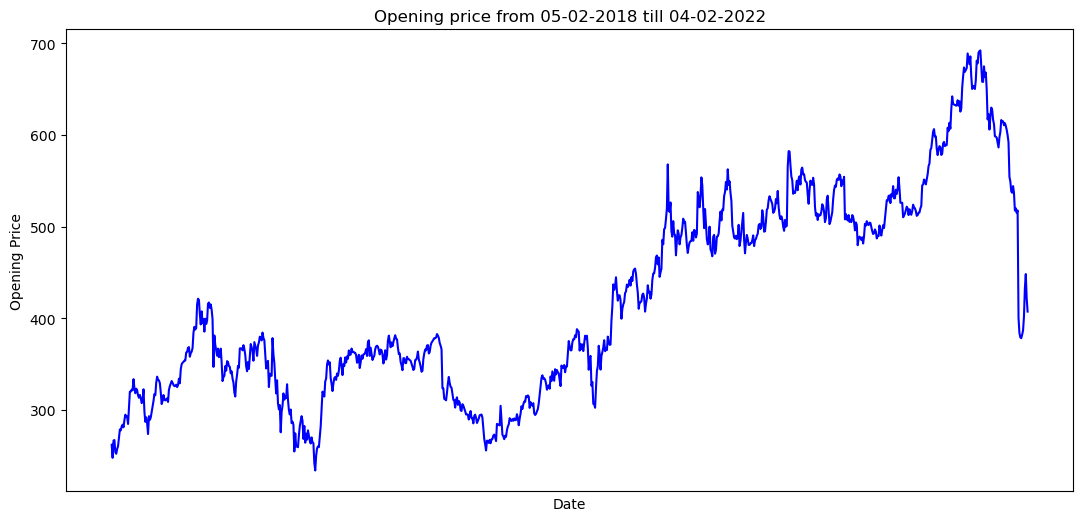

In [11]:
# Apart from histogram we can also use line graphs to analyse the stock parameters.
# These line graphs can help us analyse the upward and downward trends.
# Line graph for Opening price
plt.figure(figsize=(13, 6))  # Set the figure size

plt.xticks([])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Opening price from 05-02-2018 till 04-02-2022')

#Opening price plot
plt.plot(netflix_stock_prices['Date'],netflix_stock_prices['Open'], label='Opening Price', color='blue')

# Show plot
plt.show()

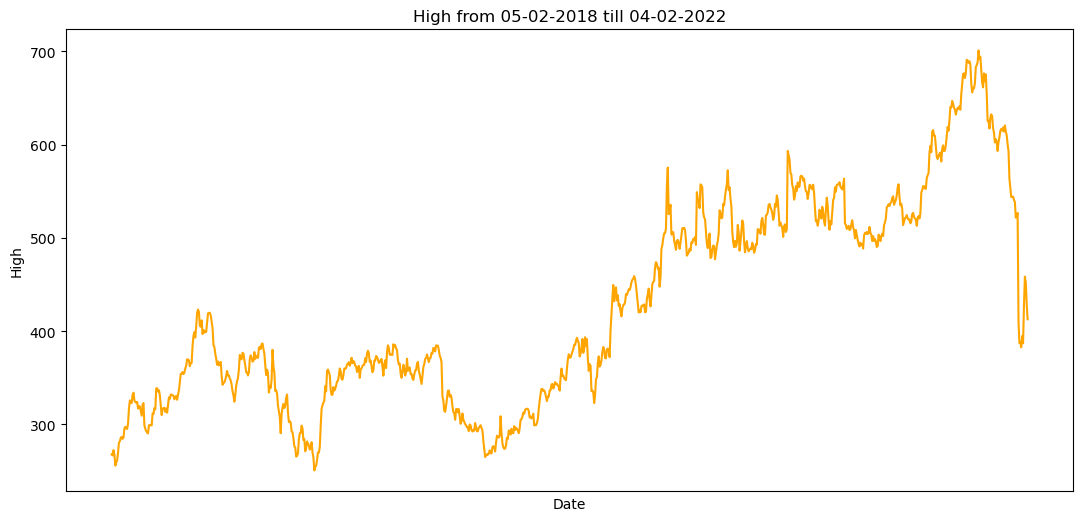

In [12]:
# Line graph for High
plt.figure(figsize=(13, 6))  # Set the figure size

plt.xticks([])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('High from 05-02-2018 till 04-02-2022')

#Closing price plot
plt.plot(netflix_stock_prices['Date'],netflix_stock_prices['High'], label='High', color='orange')

# Show plot
plt.show()

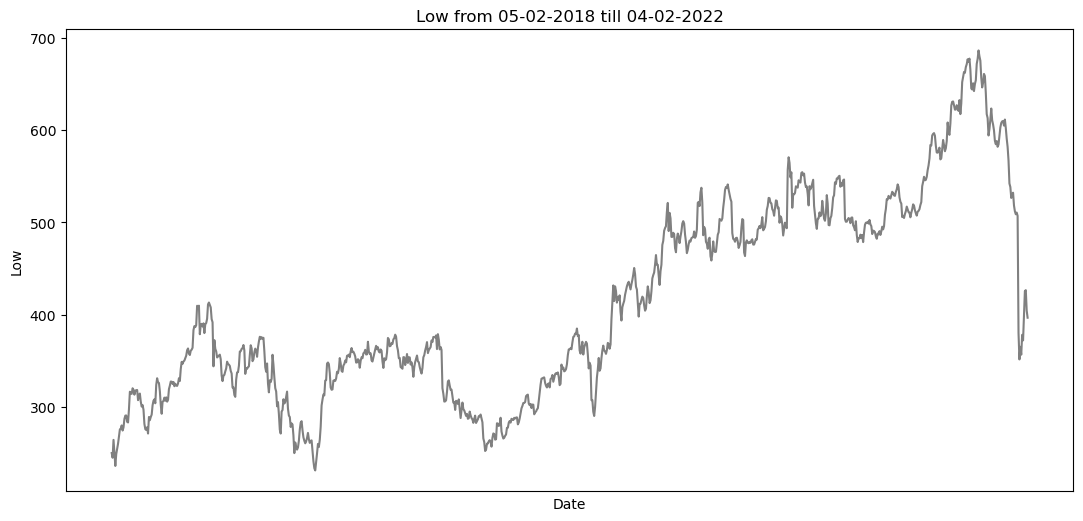

In [13]:
# Line graph for Low
plt.figure(figsize=(13, 6))  # Set the figure size

plt.xticks([])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Low from 05-02-2018 till 04-02-2022')

#Closing price plot
plt.plot(netflix_stock_prices['Date'],netflix_stock_prices['Low'], label='Low', color='grey')

# Show plot
plt.show()

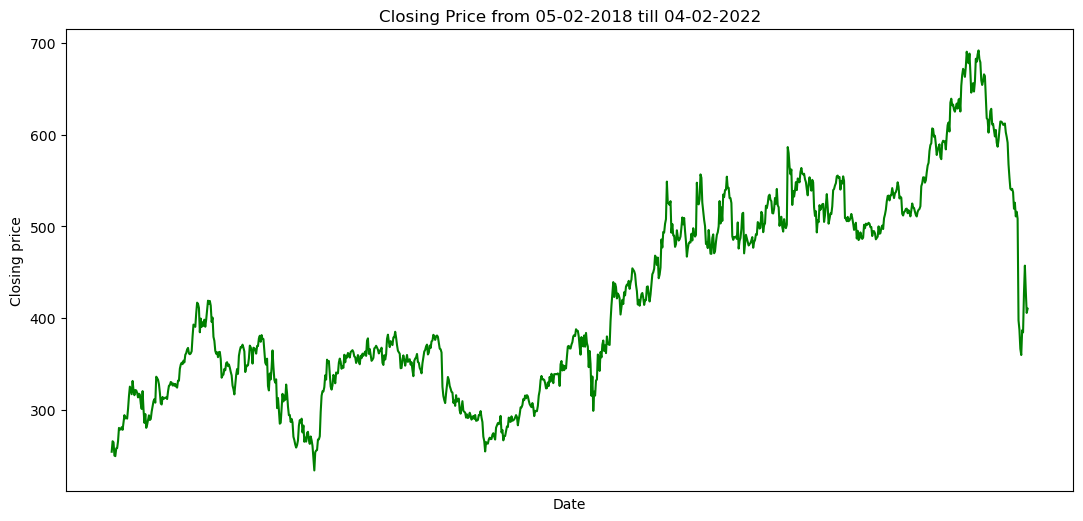

In [14]:
# Line graph for Close
plt.figure(figsize=(13, 6))  # Set the figure size

# Rotating x-axis labels for better readability
plt.xticks([])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Closing Price from 05-02-2018 till 04-02-2022')

#Closing price plot
plt.plot(netflix_stock_prices['Date'],netflix_stock_prices['Close'], label='Close', color='green')

# Show plot
plt.show()

## Step 8 - Feature Selection based on data distribution
Now we need to choose the best features for our model building. Generally we use scatter plot to visualize any relation between two continuous variables.

<Axes: title={'center': 'Open v/s Close'}, xlabel='Open', ylabel='Close'>

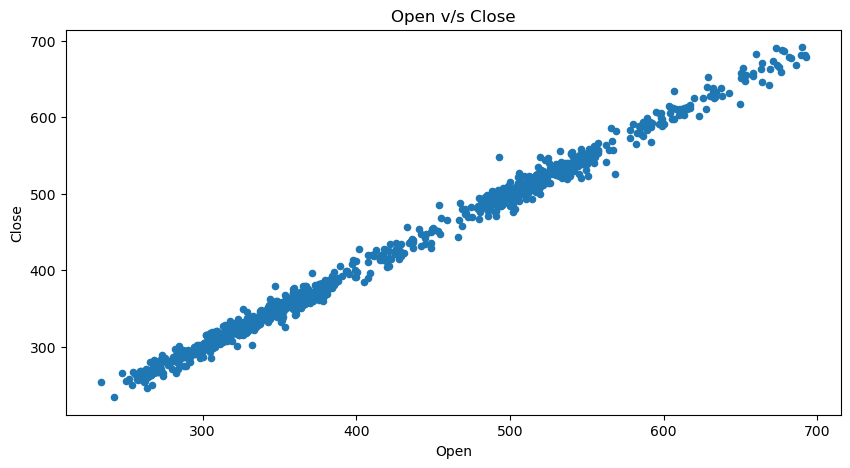

In [15]:
#Scatter plot between Open and closing price of the stock
netflix_stock_prices.plot.scatter(x='Open', y='Close', figsize=(10,5), title="Open v/s Close")

<Axes: title={'center': 'High v/s Close'}, xlabel='High', ylabel='Close'>

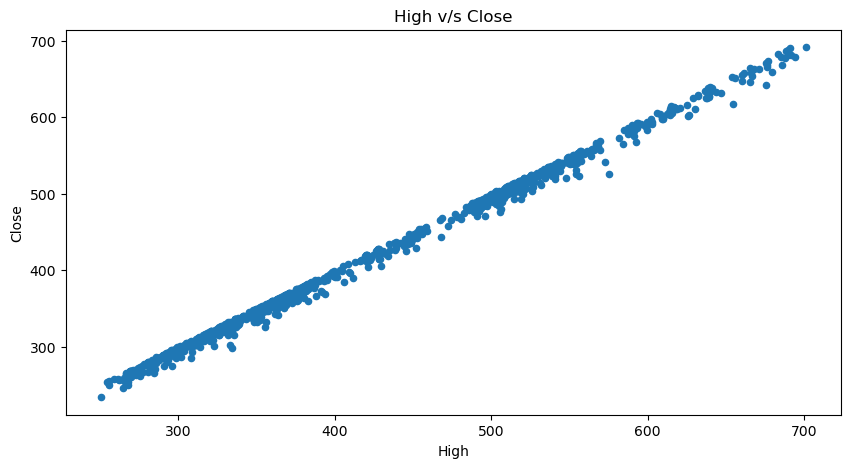

In [16]:
# Scatter plot between High and Closing price 
netflix_stock_prices.plot.scatter(x='High', y='Close', figsize=(10,5), title="High v/s Close")

<Axes: title={'center': 'Low v/s Close'}, xlabel='Low', ylabel='Close'>

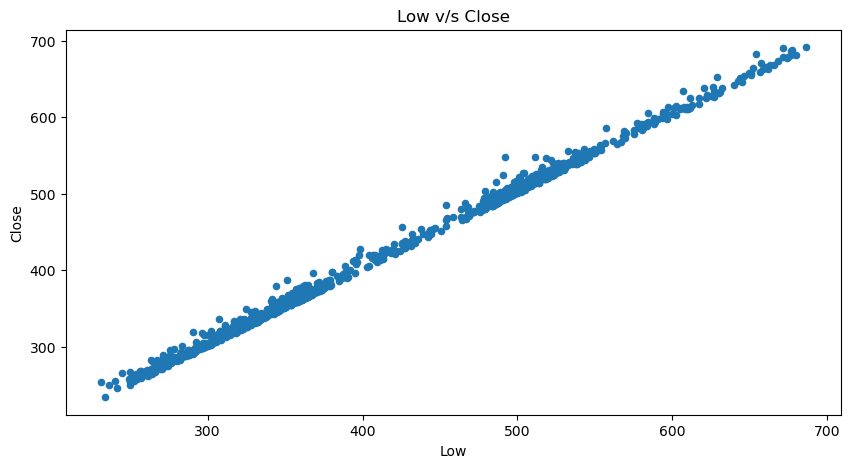

In [17]:
# Scatter plot between Low and Closing price 
netflix_stock_prices.plot.scatter(x='Low', y='Close', figsize=(10,5), title="Low v/s Close")

<Axes: title={'center': 'Volume v/s Close'}, xlabel='Volume', ylabel='Close'>

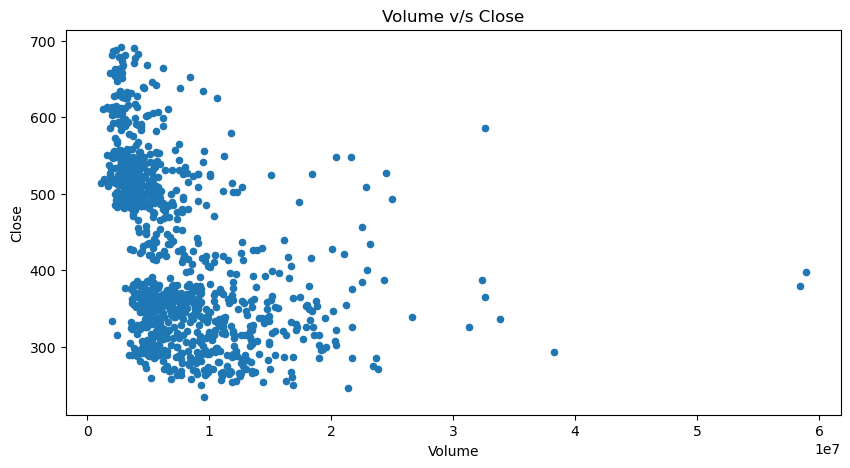

In [18]:
# Scatter plot between Volume and Closing price 
netflix_stock_prices.plot.scatter(x='Volume', y='Close', figsize=(10,5), title="Volume v/s Close")

From the first 3 plots we can clearly see that there is an increasing trend between the two variables but for the last plot which is volume vs closing price there does not seem any trend in data. Hence Volume might not be the best feature for our model.

## Step 9 - Removal of Outliers and missing values
An outlier is a data that differs significantly from the other observations in a dataset. These data points fall very far away from the main cluster of data. These values can cause hinderance in our prediction if we do not treat them. We need to either remove the outliers or replace them with median or mean of that data.
Also as seen earlier there are no missing/null values in any of our columns.

For our project we will use Interquartile range to find the outlier values
This method is non-parametric, which means it does not rely on your data following a specific distribution.
Here are the steps:

- Find quartiles: Locate the first quartile (Q1) - the value where 25% of the data falls below it, and the third quartile (Q3) - the value where 75% of the data falls below it.
- Calculate IQR: IQR = Q3 - Q1. This represents the middle 50% of your data.
- Identify outliers: Define fences using the IQR:
Upper fence = Q3 + (1.5 * IQR)
Lower fence = Q1 - (1.5 * IQR)
Data points below the lower fence or above the upper fence are considered potential outliers.

In [19]:
netflix_stock_prices.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320704,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.920000,250.650000,231.230000,233.880000,1.144000e+06
25%,331.490000,336.300000,326.000000,331.620000,4.091900e+06
50%,377.770000,383.010000,370.880000,378.670000,5.934500e+06
75%,509.130000,515.630000,502.530000,509.080000,9.322400e+06
max,692.350000,700.990000,686.090000,691.690000,5.890430e+07


In [20]:
# Finding and treating the outliers
# We shall replace the outliers with the median value
open_q1 = 331.49
open_q3 = 509.13
open_iqr = open_q3 - open_q1
open_upper_fence = round(open_q3 + (1.5 * open_iqr),2)
open_lower_fence = round(open_q1 - (1.5 * open_iqr),2)
print("Open Lower fence = ",open_lower_fence)
print("Open Upper fence = ",open_upper_fence)
open_median = netflix_stock_prices['Open'].median()

high_q1 = 336.30
high_q3 = 515.63
high_iqr = high_q3 - high_q1
high_upper_fence = round(high_q3 + (1.5 * high_iqr),2)
high_lower_fence = round(high_q1 - (1.5 * high_iqr),2)
print("High Lower fence = ",high_lower_fence)
print("High Upper fence = ",high_upper_fence)
high_median = netflix_stock_prices['High'].median()

low_q1 = 326.00
low_q3 = 502.53
low_iqr = low_q3 - low_q1
low_upper_fence = round(low_q3 + (1.5 * low_iqr),2)
low_lower_fence = round(low_q1 - (1.5 * low_iqr),2)
print("Low lower fence = ",low_lower_fence)
print("Low upper fence = ",low_upper_fence)
low_median = netflix_stock_prices['Low'].median()

outlier_treated_count = 0
for index in range(netflix_stock_prices.shape[0]):
    if netflix_stock_prices['Open'][index] < open_lower_fence or netflix_stock_prices['Open'][index] > open_upper_fence:
        netflix_stock_prices['Open'][index] = open_median
        outlier_treated_count += 1
    if netflix_stock_prices['High'][index] < high_lower_fence or netflix_stock_prices['High'][index] > high_upper_fence:
        netflix_stock_prices['High'][index] = high_median
        outlier_treated_count += 1
    if netflix_stock_prices['Low'][index] < low_lower_fence or netflix_stock_prices['Low'][index] > low_upper_fence:
        netflix_stock_prices['Low'][index] = low_median
        outlier_treated_count += 1

print("Number of outliers treated = ",outlier_treated_count)

Open Lower fence =  65.03
Open Upper fence =  775.59
High Lower fence =  67.31
High Upper fence =  784.62
Low lower fence =  61.21
Low upper fence =  767.32
Number of outliers treated =  0


Hence we can see that there are no outliers in our data

## Step 10 - Visual and Statistic Correlation analysis for selection of best features
We can use correlation matrix to check how much the feature is related to our target variable. 

In [21]:
# Print the correlation amtrix of our dataframe
# Consider columns except for date
columns_for_correlation = ['Open','High','Low','Close','Volume']
correlation_df = netflix_stock_prices[columns_for_correlation]
correlation_matrix = correlation_df.corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.998605  0.998508  0.996812 -0.415838
High    0.998605  1.000000  0.998203  0.998551 -0.400699
Low     0.998508  0.998203  1.000000  0.998544 -0.432116
Close   0.996812  0.998551  0.998544  1.000000 -0.413362
Volume -0.415838 -0.400699 -0.432116 -0.413362  1.000000


A correlation matrix is a square matrix that displays the correlation coefficients between pairs of variables in a dataset. Each cell in the matrix represents the correlation coefficient between two variables, indicating the strength and direction of their linear relationship.

Correlation coefficients range between -1 and 1:

- A correlation coefficient of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other variable also increases proportionally.
- A correlation coefficient of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases proportionally.
- A correlation coefficient close to 0 suggests little to no linear relationship between the variables.

In [22]:
# Here as Closing price is the target variable, let's consider only the correlation with it
print(correlation_matrix['Close'])

Open      0.996812
High      0.998551
Low       0.998544
Close     1.000000
Volume   -0.413362
Name: Close, dtype: float64


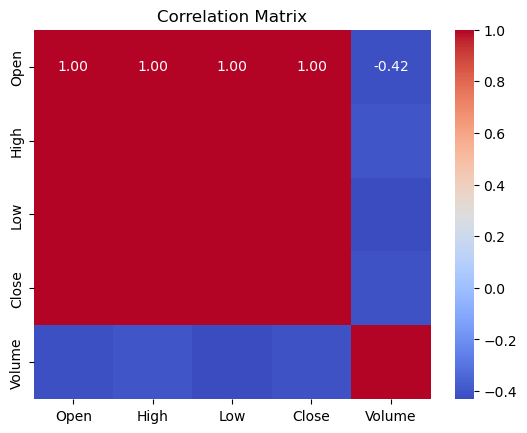

In [23]:
# Visualizing the correlation matrix
sbn.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

Thus we can clearly see that Opening price, High, Low are very closely related to the closing price of the stock.

## Step 11 - Data Conversion to numeric values for machine learning/predictive analysis
Here there are no categorical values and all are numeric valued columns hence no conversion required.

## Step 12 - Training/Testing Sampling and K-fold cross validation
# Training and Testing Sampling
- In training/testing sampling, we split your dataset into training set and a testing set.
- The training set is used to train the machine learning model, while the testing set is used to evaluate its performance.
- Typically, we allocate a larger portion of the data to the training set and the remaining portion to the testing set.

# K Fold Cross Validation
- K-fold cross-validation is a technique used to assess the performance of a machine learning model.
- In k-fold cross-validation, we split the dataset into k subsets or folds of approximately equal size.
- We then perform training/testing multiple times (k times), each time using a different fold as the testing set and the remaining folds as the training set.
- After running k iterations, we calculate the average performance metric across all iterations to get a more robust estimate of your model's performance.
Firstly we will use the Linear Regression algorithm to predict the stock prices.

Linear Regression - It is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data, aiming to minimize the sum of squared differences between the observed and predicted values.

In [24]:
# Creating a Linear regression model
stock_prediction_linear_model = LinearRegression()

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits = k_folds, shuffle=True, random_state=42)

# Define X and y
X = netflix_stock_prices[['Open', 'High', 'Low']]  # Input variables
y = netflix_stock_prices['Close']  # Target variable

#Train the model
stock_prediction_linear_model.fit(X,y)

# Perform k-fold cross-validation
cv_scores = cross_val_score(stock_prediction_linear_model, X, y, cv=kf, scoring='r2')

# Calculate mean and standard deviation of the cross-validation scores
mean_linear_r2_score = np.mean(cv_scores)

print("Mean R^2 Score:", mean_linear_r2_score)

Mean R^2 Score: 0.9986465670708299


Ideally the mean R2 score should be close to 1, which we got above. Hence Linear Regression turns out to be a very good model.

## Step 13 - Investigating multiple Regression Algorithms

Lets try some other Regression algorithms and test their accuracy.

Polynomial Regression - Polynomial regression extends linear regression by fitting a polynomial function to the relationship between the independent and dependent variables, allowing for nonlinear relationships to be captured through the use of higher-order polynomial terms.

In [25]:
# Lets go with Polynomial Regression.

# Specify the degree of polynomial features
degree = 3  # Adjust as needed

# Create the PolynomialFeatures object
stock_prediction_poly_features = PolynomialFeatures(degree = degree)

# Transform the input features
X_poly = stock_prediction_poly_features.fit_transform(X)

# Create the LinearRegression object
stock_prediction_polynomial_model = LinearRegression()

# Fit the model to the polynomial features
stock_prediction_polynomial_model.fit(X_poly, y)

y_poly_pred = stock_prediction_polynomial_model.predict(X_poly)

# Compute evaluation metrics
poly_r2 = r2_score(y, y_poly_pred)

print("R^2 Score:", poly_r2)

R^2 Score: 0.9988020289490502


For the above polynomial regression model we can see that it gave a score which is very close to 1. Hence this algorithm also suits very well for stock prediction

## Now lets try the KNN regressor model.
KNN - 
K-Nearest Neighbors (KNN) regressor predicts the target variable of a new data point by averaging the target values of its k nearest neighbors in the feature space.

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor object
k = 5  # Number of neighbors
stock_prediction_knn_regressor = KNeighborsRegressor(n_neighbors = k)

# Train the regressor
stock_prediction_knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_knn_pred = stock_prediction_knn_regressor.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_knn_pred)
knn_r2_score = r2_score(y_test, y_knn_pred)
print("R^2 Score:", knn_r2_score)

R^2 Score: 0.9978923184142244


Using the KNN Regressor algorithm too we got a very good r2 score close to 1.

## Step 14 - Selection of the best model
Though all the three algorithms gave a very good r2 score. let's try to predict some stock values using these three algorithms and compare the results.

In [27]:
#Predicting the stock values using the three models we built
stock_price_by_linear = stock_prediction_linear_model.predict([[281,286,277.80]])
print(stock_price_by_linear)

X_test_poly = stock_prediction_poly_features.fit_transform([[281,286,277.80]])
stock_price_by_polynomial = stock_prediction_polynomial_model.predict(X_test_poly)
print(stock_price_by_polynomial)

stock_price_by_knn = stock_prediction_knn_regressor.predict([[281,286,277.80]])
print(stock_price_by_knn)

# Acutal Result -> 23/02/2018	281	286	277.809998	 close = 285.929993

[282.86339986]
[282.7054641]
[282.858]


Thus if we compare the results from three models the closest result was given by the linear regression model.
Also there are some reasons why we can go with linear regression over polynomial and knn regressor model
- Linear Reression is efficient and works very well for large dataset
- choosing the value of degree and k can be challenging for polynomial and KNN regressor models.
- KNN can be computationally expensive as it involves calculating distance for the data points

Hence, I have chosen Linear Regression model over the other two.

# Step 15 - Deployment of the best model in production
Lets deploy the Linear regression model.

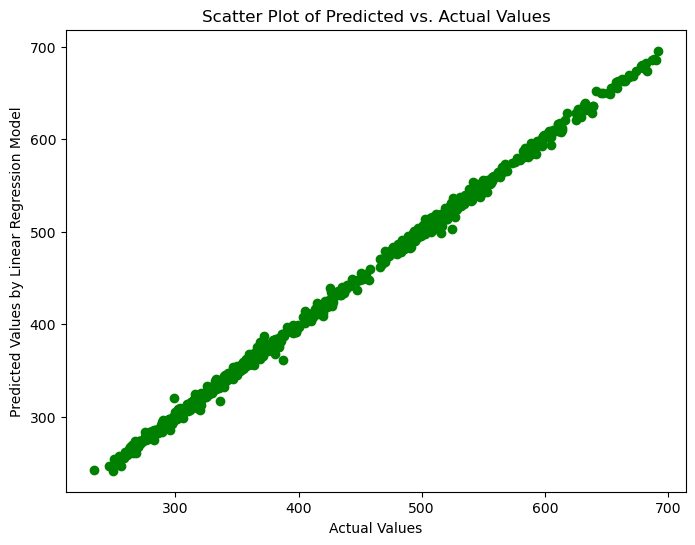

In [28]:
# Scatter plot for predicted vs actual values
stock_prices_by_linear_model = stock_prediction_linear_model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, stock_prices_by_linear_model,color = 'green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values by Linear Regression Model')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()

The above graph shows that the model predicted the stock values very well.

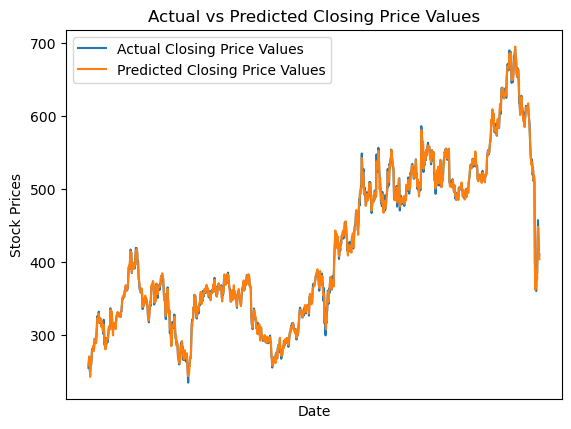

In [29]:
plt.plot(netflix_stock_prices['Date'], netflix_stock_prices['Close'], label='Actual Closing Price Values')

# Plot the second line graph
plt.plot(netflix_stock_prices['Date'], stock_prices_by_linear_model, label='Predicted Closing Price Values')

plt.xticks([])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Actual vs Predicted Closing Price Values')

# Add legend
plt.legend()

# Show plot
plt.show()

From the above line graph too we can see that the two lines almost overlap with each other showing the correctness of the predicted stock values.

## Step 16 - GUI/WEB Deployment using either tkinter/Flask/Streamlit
I have built a code for the tkinter gui window.

In [30]:
def calculate_close():
    try:
        open_value = float(open_entry.get())
        high_value = float(high_entry.get())
        low_value = float(low_entry.get())

        if high_value < low_value:
            close_entry.config(state = "normal")
            close_entry.delete(0, tk.END)
            close_entry.insert(0, "Invalid High, Low")
            close_entry.config(state = "readonly")
            return

        if open_value < 0 or high_value < 0 or low_value < 0:
            close_entry.config(state = "normal")
            close_entry.delete(0, tk.END)
            close_entry.insert(0, "Prices cannot be -ve")
            close_entry.config(state = "readonly")
            return
            
        # Perform some calculation to get the Close value
        close_value = round(stock_prediction_linear_model.predict([[open_value, high_value, low_value]])[0],2)
        
        # Update the Close entry with the calculated value
        close_entry.config(state = "normal")
        close_entry.delete(0, tk.END)
        close_entry.insert(0, str(close_value))
        close_entry.config(state = "readonly")
        
    except ValueError:
        close_entry.config(state = "normal")
        close_entry.delete(0, tk.END)
        close_entry.insert(0, "Invalid Input")
        close_entry.config(state = "readonly")

# Create the main window
root = tk.Tk()
root.title("Stock Price Predictor")

# Create labels and entry widgets for Open, High, Low, and Close
open_label = ttk.Label(root, text="Opening price:")
open_label.grid(row=0, column=0, padx=5, pady=5)
open_entry = ttk.Entry(root)
open_entry.grid(row=0, column=1, padx=5, pady=5)

high_label = ttk.Label(root, text="High:")
high_label.grid(row=1, column=0, padx=5, pady=5)
high_entry = ttk.Entry(root)
high_entry.grid(row=1, column=1, padx=5, pady=5)

low_label = ttk.Label(root, text="Low:")
low_label.grid(row=2, column=0, padx=5, pady=5)
low_entry = ttk.Entry(root)
low_entry.grid(row=2, column=1, padx=5, pady=5)

close_label = ttk.Label(root, text="Closing price:")
close_label.grid(row=3, column=0, padx=5, pady=5)
close_entry = ttk.Entry(root, state="readonly")
close_entry.grid(row=3, column=1, padx=5, pady=5)

# Create a button to calculate the Close value
calculate_button = ttk.Button(root, text="Calculate Close", command=calculate_close)
calculate_button.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

# Run the GUI
root.mainloop()
